In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from mlxtend.preprocessing import TransactionEncoder  # return true false values for the data values by checking its presence in the row 

from mlxtend.frequent_patterns import apriori,association_rules  #for support,confidence,lift metric

In [3]:
data=pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape[0]

7501

In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [10]:
data.shape[1]

20

# Apriori and association algorithm implementation

In [27]:
frequent_itemsets=apriori(dataset,min_support=0.01,use_colnames=True) #to generate itemset
frequent_itemsets['length']=frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
227,0.010932,"(chocolate, mineral water, ground beef)",3
228,0.011065,"(ground beef, mineral water, milk)",3
229,0.011065,"(frozen vegetables, mineral water, milk)",3
230,0.010532,"(spaghetti, chocolate, eggs)",3


In [54]:
frequent_itemsets[(frequent_itemsets['length']==2 )& (frequent_itemsets['support']>=0.05)]

,support,itemsets,length
50,0.050927,"(eggs, mineral water)",2
51,0.059725,"(spaghetti, mineral water)",2
53,0.052660,"(chocolate, mineral water)",2


In [55]:
frequent_itemsets[(frequent_itemsets['length']==3 )].head()

,support,itemsets,length
215,0.014265,"(spaghetti, eggs, mineral water)",3
216,0.013465,"(chocolate, eggs, mineral water)",3
217,0.013065,"(eggs, milk, mineral water)",3
218,0.010132,"(ground beef, eggs, mineral water)",3
219,0.010132,"(spaghetti, french fries, mineral water)",3


Now,we will use the extracted frequent itemsets in rule creation

In [56]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1.2)
rules['antecedents_length']=rules['antecedents'].apply(lambda x:len(x))
rules['consequents_length']=rules['consequents'].apply(lambda x:len(x))
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
219,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
218,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
290,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
291,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
307,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
60,(low fat yogurt),(eggs),0.076523,0.179709,0.016798,0.219512,1.221484,0.003046,1.050997,1,1
164,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
165,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
122,(french fries),(escalope),0.170911,0.079323,0.016398,0.095944,1.209537,0.002841,1.018385,1,1


According the above table we can easily say that the dependency between (herb & pepper) and (ground beef) is high since lift value is approximately 2.5x of threshold value and conviction is higher than 1

In [58]:
#sort values based on their confidence
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
266,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
324,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
318,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
330,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
34,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
47,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,1,1
311,(mineral water),"(olive oil, spaghetti)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
49,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
271,(mineral water),"(ground beef, eggs)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,1,2


now see the confidence matrix without mineral water

In [60]:
rules[~rules['consequents'].str.contains('mineral water',regex=False) &
     ~rules['antecedents'].str.contains('mineral water',regex=False)].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
74,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
110,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,1,1
88,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,1,1
342,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,2,1
57,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,1,1
...,...,...,...,...,...,...,...,...,...,...,...
347,(spaghetti),"(chocolate, milk)",0.174110,0.032129,0.010932,0.062787,1.954217,0.005338,1.032712,1,2
153,(chocolate),(soup),0.163845,0.050527,0.010132,0.061839,1.223888,0.001853,1.012058,1,1
341,(spaghetti),"(chocolate, eggs)",0.174110,0.033196,0.010532,0.060490,1.822232,0.004752,1.029052,1,2
111,(spaghetti),(red wine),0.174110,0.028130,0.010265,0.058959,2.095966,0.005368,1.032761,1,1


# According the redifined table there is a significant relationship between ground beef and spaghetti ,red wine,olive oli

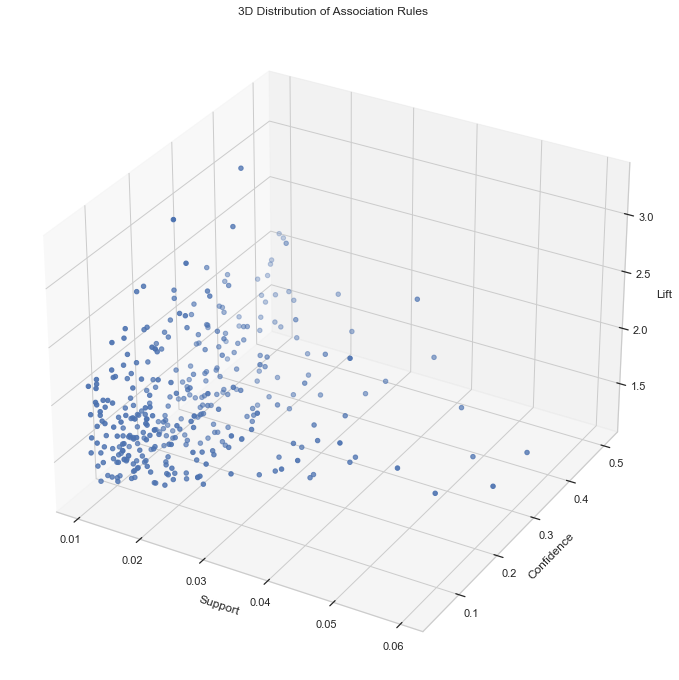

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

In [69]:
spaghetti_rules = rules[rules['consequents'].astype(str).str.contains('spaghetti')]
spaghetti_rules = spaghetti_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(spaghetti_rules.head())

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
1,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
2,"(ground beef, mineral water)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470,2,1
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
4,(milk),"(chocolate, spaghetti)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329,1,2
